# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

### Откройте файл с данными и изучите общую информацию. 

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


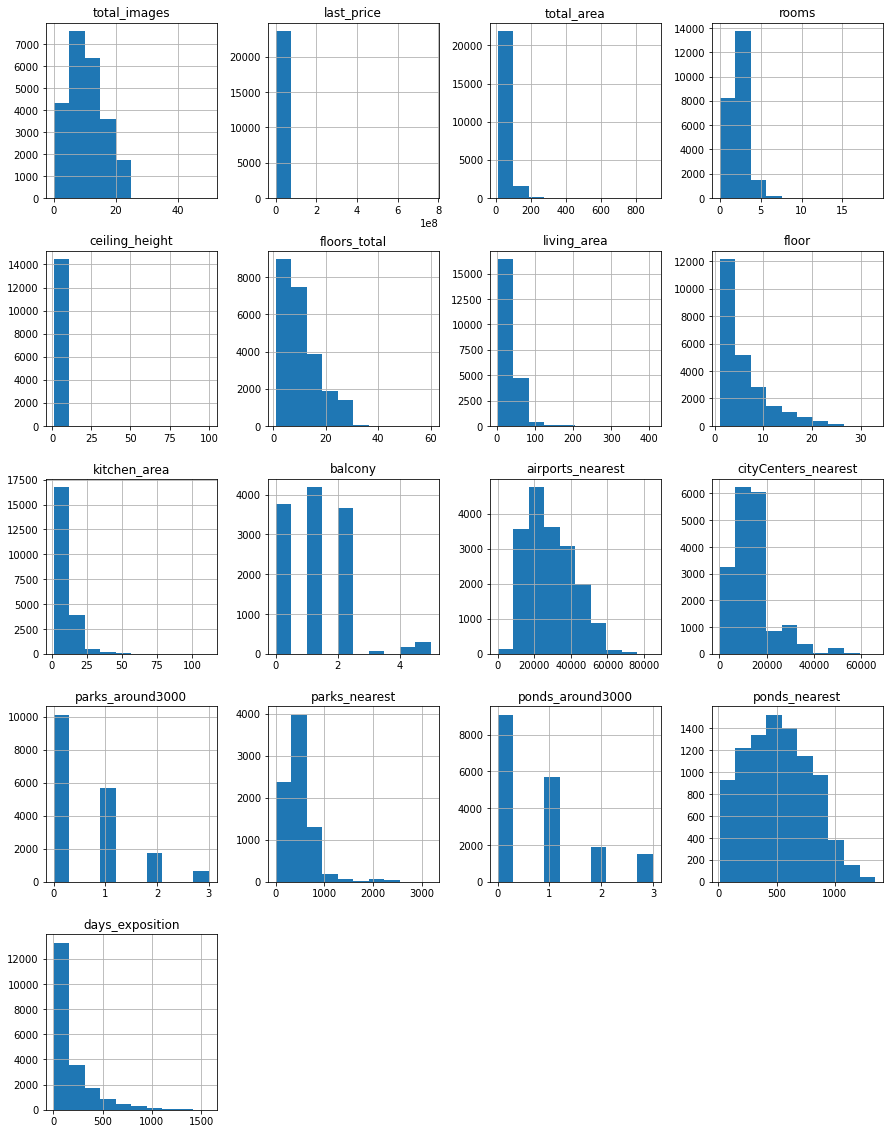

In [6]:
data.hist(figsize=(15,20));

### Предобработка данных

#### Переименовываем столбцы

Просто приводим названия столбцов к одному формату

In [7]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                     'parks_around3000':'parks_around_3000',
                     'ponds_around3000':'ponds_around_3000'})

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Обработаем пропуски

Найдем столбцы с пропусками

In [9]:
for col in data.columns:
    pct_missing = np.mean(data[col].isna())
    if pct_missing*100 != 0:
        print('{} - {}%'.format(col, round(pct_missing*100)))

ceiling_height - 39%
floors_total - 0%
living_area - 8%
is_apartment - 88%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
city_centers_nearest - 23%
parks_around_3000 - 23%
parks_nearest - 66%
ponds_around_3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


Я не вижу смысла менять название населенного пункта, пусть и останется NA.

In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

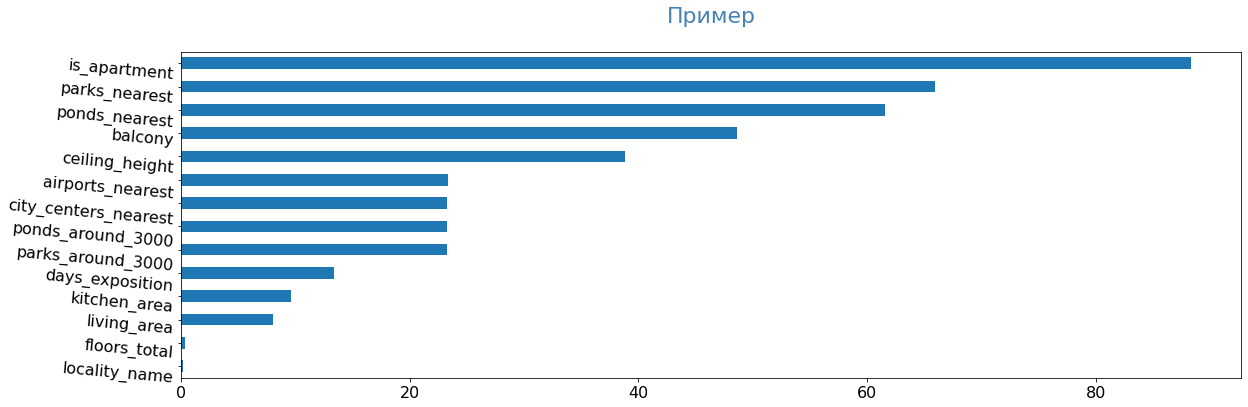

In [11]:
pass_value_barh(data)

##### **Кол-во этажей**

Заменим на медиану и округлим. Если значение общего кол-ва этажей меньше этажа квартиры, поставим этот этаж как максимальный.

In [13]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median().round(1))

In [14]:
data.loc[data['floors_total'] < data['floor'],['floors_total']] = data.loc[data['floors_total'] < data['floor'],['floor']]

In [15]:
data.query('floors_total < floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


##### **Высота потолков**

Сложно определить причину пропуска этого значения. Вероятнее всего это просто человеческий фактор. Потому удобнее заменить высоту по медиане.

In [16]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median().round(1))

In [17]:
data['ceiling_height'].isna().sum()

0

##### **Жил. площадь**

Это очень важная характеристика. Я думаю можно найти средний процент жилой площади от общей площади и подставить площадь помноженную на процент.

In [18]:
data.loc[data['living_area'].isna(), ['living_area']] = (
    data.loc[data['living_area'].isna(), ['total_area']] * 
    (data['living_area'] / data['total_area']).mean()
).to_numpy()

In [19]:
# data = data.dropna(subset=['living_area'])

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Не стоит удалять 2000 записей из-за пропуска в одной колонке 
        
        data = data.dropna(subset=['living_area'])

In [20]:
data['living_area'].isna().sum()

0

##### **Апартаменты**

Скорее всего если нет этого значения, значит это просто не апартаменты. Потому логична замена просто на *False*.

In [21]:
data['is_apartment'] = data['is_apartment'].fillna('False')

In [22]:
data['is_apartment'].isna().sum()

0

##### **Метраж кухни**

Значение вероятно было потеряно из-за человеческого фактока. Т.к. от кухни тоже зависит многое, но все не настолько страшно, как с жил. площадью, заменим медианой.

In [23]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())

In [24]:
(data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])).sum()

1042

Выбивающиеся значения заменим на разность 89% общей площади (чтобы было чуть меньше проверяемого) и жилой площади.

In [25]:
data.loc[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area']), ['kitchen_area']] = (
    data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]['total_area']*0.89 - 
    data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]['living_area']
)

In [26]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.363652
std          5.555157
min        -15.300000
25%          7.038500
50%          9.530000
75%         11.350000
max        112.000000
Name: kitchen_area, dtype: float64

Могу предположить, что значения меньше 5 кв.м это квартиры, где нет кухонь. Может должно быть значение и меньше, но я возьму такое.

In [27]:
data.loc[data['kitchen_area'] < 5] = 0

In [28]:
data['kitchen_area'].isna().sum()

0

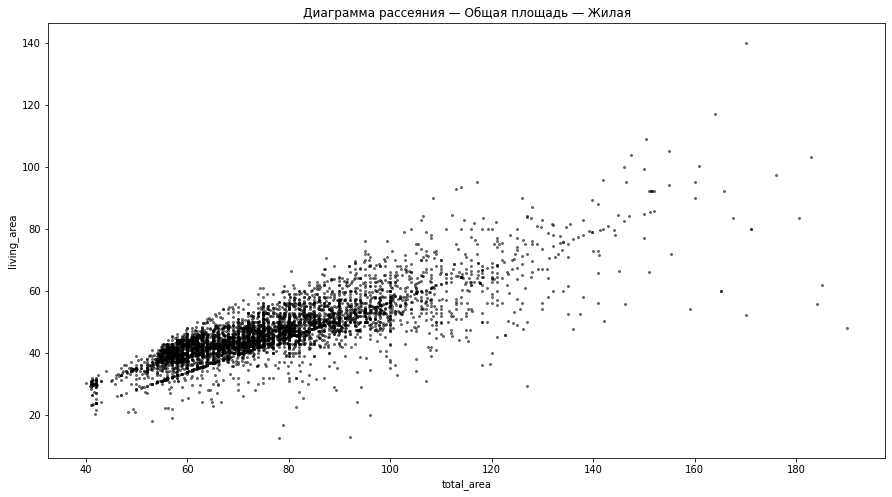

In [29]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

##### **Количество балконов**

Скорее всего, если нет значения по балконам, то балконов просто нет. Заменим значение на *0*.

In [30]:
data['balcony'] = data['balcony'].fillna(0) 

In [31]:
data['balcony'].isna().sum()

0

##### **Ближайшие аэропорты**

Вероятно значение отсутствует из-за человеческого фактора. Заменим на медиану.

In [32]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

##### **Расстояние до центра города**

Отсутствует из-за человеческого фактора. Заменим на медиану.

In [33]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

##### **Парки**

Раз пропущено значение, вероятно парков в радиусе 3000 нет. Заменим на *0*.

In [34]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

Если отсутствует значение в просто ближайшем парке, вероятно поблизости их нет, а потому оставим пропуски здесь.

In [35]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

##### **Водоемы**

Раз пропущено значение, вероятно водоемов в радиусе 3000 нет. Заменим на *0*.

In [36]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

Если отсутствует значение в просто ближайшем водоеме, вероятно они слишком далеко, а потому оставим пропуски здесь.

In [37]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

##### **Сколько было висела публикация**

Раз значение отсутствует, сама квартира еще не продана, а потому оставим пропуски.

#### Корректируем типы данных

In [38]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                   object
open_plan                object
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Скорректируем столбцы с неправильным типом.

is_apartment - это должно быть булевое значение, потому что 

In [39]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Значения *'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition', 'floors_total', 'last_price', 'airports_nearest', 'city_centers_nearest'* поменяем на int64, потому что для них важна только целая часть.

In [40]:
for row in ['balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition', \
            'floors_total', 'last_price', 'airports_nearest', 'city_centers_nearest']:
    data[row] = data[row].astype(int, errors='ignore')

Посмотрим формат даты и после этого переведем в формат datetime.

In [41]:
data['first_day_exposition'][0]

'2019-03-07T00:00:00'

In [42]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим итог.

In [43]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                          object
open_plan                       object
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest                 int64
city_centers_nearest             int64
parks_around_3000                int64
parks_nearest                  float64
ponds_around_3000                int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Обработаем повторы

Можно просто разделить все названия по пробелам и откинуть ту часть, что начинается не с заглавной буквы.

In [44]:
len(data['locality_name'].unique())

364

In [45]:
def get_only_name(string):
    splitted_string = str(string).split()
    for index in range(len(splitted_string)):
        if splitted_string[index][0].isupper() or splitted_string[index][0].isdigit():
            return ' '.join(splitted_string[index:])

Проверим работу функции.

In [46]:
print(get_only_name('посёлок Платформа 69-й километр'))

Платформа 69-й километр


In [47]:
data['only_name'] = data['locality_name'].apply(get_only_name)

In [48]:
len(data['only_name'].unique())

305

Количество наименований уменьшилось, но это еще ничего не значит. Надо проверить вручную.

In [49]:
data['only_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', '0', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Але

В целом функция выполнила свое предназначение и выцепила само имя населенного пункта. 

In [50]:
# check
data.only_name.nunique()

304

In [51]:
len(data)- len(data.drop_duplicates())

422

#### Корректировка аномалий

In [52]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23663.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,20561.000000
mean,9.704966,6.467994e+06,59.660229,2.045445,2.655304,10.462748,34.018613,5.778556,10.313519,0.580826,27744.105869,13653.984725,0.463353,450.010718,0.582345,485.796996,178.036623
std,5.788473,1.086051e+07,36.295757,1.099952,1.027730,6.657356,22.598252,4.886396,5.626499,0.955193,11632.714930,7709.708990,0.745112,209.328475,0.880918,183.525275,219.577697
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.038500,0.000000,20498.000000,10647.000000,0.000000,441.000000,0.000000,480.000000,42.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.530000,0.000000,26293.000000,12948.000000,0.000000,441.000000,0.000000,480.000000,93.000000
75%,14.000000,6.750000e+06,69.655000,3.000000,2.700000,15.000000,42.000000,8.000000,11.350000,1.000000,34160.500000,15186.000000,1.000000,441.000000,1.000000,480.000000,228.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


##### Цена

Нижняя планка цены выглядит неправдоподобно низкой.

In [53]:
 data.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,only_name
76,0,0,0.0,1970-01-01,0,0.0,0.0,0.0,0,False,...,0,0,0,0,0,0.0,0,0.0,0.0,0
184,0,0,0.0,1970-01-01,0,0.0,0.0,0.0,0,False,...,0,0,0,0,0,0.0,0,0.0,0.0,0
220,0,0,0.0,1970-01-01,0,0.0,0.0,0.0,0,False,...,0,0,0,0,0,0.0,0,0.0,0.0,0
237,0,0,0.0,1970-01-01,0,0.0,0.0,0.0,0,False,...,0,0,0,0,0,0.0,0,0.0,0.0,0
298,0,0,0.0,1970-01-01,0,0.0,0.0,0.0,0,False,...,0,0,0,0,0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23484,11,470000,44.5,2018-07-02,2,2.6,2.0,28.0,2,True,...,0,Сланцы,26293,12948,0,441.0,0,480.0,298.0,Сланцы
23498,0,0,0.0,1970-01-01,0,0.0,0.0,0.0,0,False,...,0,0,0,0,0,0.0,0,0.0,0.0,0
23579,0,0,0.0,1970-01-01,0,0.0,0.0,0.0,0,False,...,0,0,0,0,0,0.0,0,0.0,0.0,0
23678,0,0,0.0,1970-01-01,0,0.0,0.0,0.0,0,False,...,0,0,0,0,0,0.0,0,0.0,0.0,0


Выбивается это значение. Значение выглядит на 1000 меньше, чем должно быть.

In [54]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price'] * 1000

Остальные значения мне выглядят невероятно низкими, но имеют место быть.

 ##### Высота потолков

Думаю числа в диапозоне от 25 до 100 можно поделить на 10, получатся правдоподобные числа.

In [55]:
data.loc[data['ceiling_height'] > 25, 'ceiling_height'] = data[data['ceiling_height'] > 25]['ceiling_height'] / 10

Иные аномальные значения, а именно от 15 до 25 заменим на медиану.

In [56]:
data.loc[((data['ceiling_height'] >= 15) & (data['ceiling_height'] <= 25)), 'ceiling_height'] = data['ceiling_height'].median()

In [57]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.631814
std          0.437259
min          0.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

##### Общая площадь

Еще вызывает опасения значение в 900 кв.м. площадь. Проверим еще значения, может есть еще выбивающиеся.

In [58]:
 data.query('total_area > 600')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,only_name
3117,19,140000000,631.0,2019-03-30,7,2.6,5.0,356.367044,5,True,...,0,Санкт-Петербург,25707,4972,0,441.0,2,210.0,NaN,Санкт-Петербург
12859,20,140000000,631.2,2019-04-09,7,3.9,4.0,322.300000,4,True,...,1,Санкт-Петербург,25707,4972,0,441.0,2,210.0,NaN,Санкт-Петербург
15651,20,300000000,618.0,2017-12-18,7,3.4,7.0,258.000000,5,True,...,0,Санкт-Петербург,32440,5297,0,441.0,2,198.0,111.0,Санкт-Петербург
19540,8,420000000,900.0,2017-12-06,12,2.8,25.0,409.700000,25,True,...,0,Санкт-Петербург,30706,7877,0,441.0,2,318.0,106.0,Санкт-Петербург


##### Удаление выбросов

Так как выборосов много и вручную их сложно обрабатывать, удалим выбросы по квантилям.

In [59]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .997]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")

)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.5,2.00,52.00,2.60,93.00,"4,600,000.00",30.00,9.53,4.00,9.00
0.99,5.00,197.00,3.57,"1,067.00","36,000,000.00",121.00,33.19,23.00,26.00
0.997,7.00,289.81,4.00,"1,269.60","73,742,204.74",177.27,45.00,25.00,27.00


In [60]:
filtered = data
columns_to_filter = ['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area', \
                      'kitchen_area', 'floor',   'floors_total']

for i in columns_to_filter:
    Q1 =  data[i].quantile(0.15)
    Q3 = data[i].quantile(0.9)
    IQR = Q3 - Q1

    filtered = filtered[~((filtered[i] < (Q1-1.5*IQR)) | (filtered[i] > (Q3+1.5*IQR)))]

In [61]:
print(f'Уровень потерь: {round(100 - (filtered.shape[0] / data.shape[0] * 100), 1)}%')

Уровень потерь: 6.7%


In [62]:
(
    filtered[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,117.00","22,117.00","22,117.00","19,245.00","22,117.00","22,117.00","22,117.00","22,117.00","22,081.00"
min,0.00,17.20,1.75,1.00,"430,000.00",2.00,5.00,1.00,1.00
max,6.00,180.10,3.75,"1,104.00","23,000,000.00",111.86,28.10,29.00,37.00


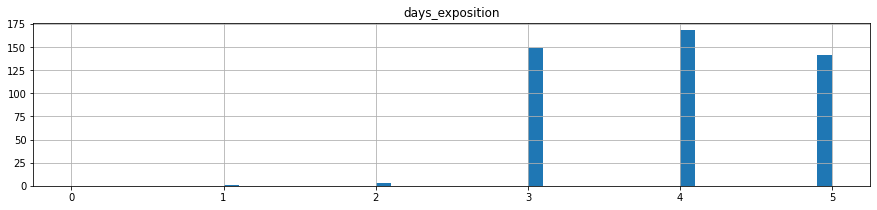

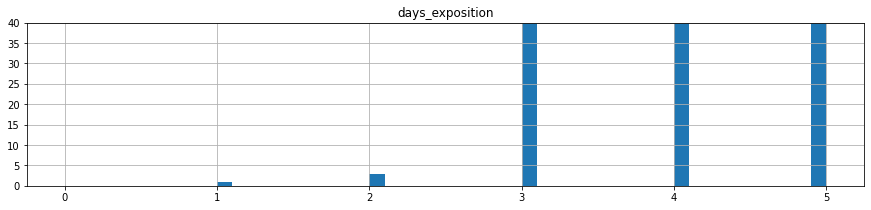

In [63]:
# check
filtered.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

filtered.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [64]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","20,561.00","23,699.00","23,699.00","23,699.00","23,699.00","23,663.00"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,19.00,900.00,14.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


Учитывая остальные показатели этих квартир, выглядят правдоподобно показатели.

#### check gap

In [65]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23663 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  object        
 11  open_plan             23699 non-null  object        
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [66]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","20,561.00","23,699.00","23,699.00","23,699.00","23,699.00","23,663.00"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,19.00,900.00,14.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [67]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'median', 'mean', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","20,561.00","23,699.00","23,699.00","23,699.00","23,699.00","23,663.00"
median,2.00,52.00,2.60,93.00,"4,600,000.00",30.00,9.53,4.00,9.00
mean,2.05,59.66,2.63,178.04,"6,468,508.11",34.02,10.31,5.78,10.46
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,19.00,900.00,14.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [68]:
try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [69]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


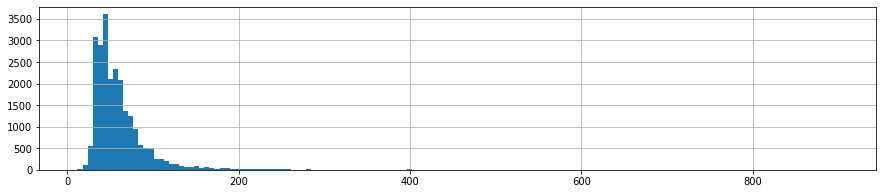

In [70]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

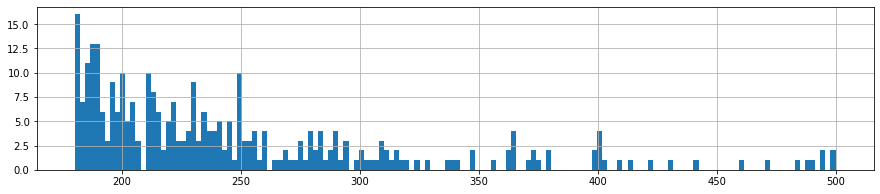

In [71]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

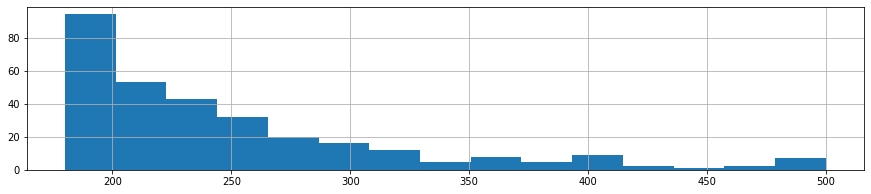

In [72]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

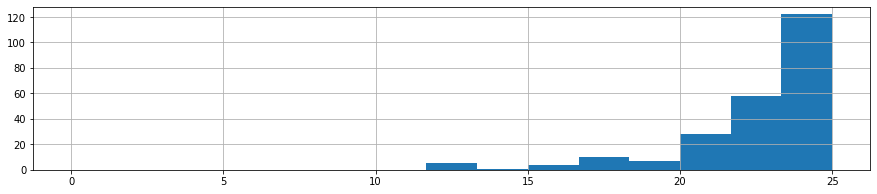

In [73]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [74]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.5,2.00,52.00,2.60,93.00,"4,600,000.00",30.00,9.53,4.00,9.00
0.99,5.00,197.00,3.57,"1,067.00","36,000,000.00",121.00,33.19,23.00,26.00
0.9988,8.00,380.00,4.40,"1,369.64","124,423,112.00",228.21,55.87,26.00,35.00


### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [75]:
filtered['price_per_square_meter'] = filtered['last_price'] / filtered['total_area']

День недели публикации объявления

In [76]:
filtered['day_of_week'] = filtered['first_day_exposition'].dt.weekday

Месяц публикации объявления

In [77]:
filtered['month'] = filtered['first_day_exposition'].dt.month

Год публикации объявления

In [78]:
filtered['year'] = filtered['first_day_exposition'].dt.year

Тип этажа

In [79]:
(filtered['floor'] < 0).sum()

0

In [80]:
def floor_type(floor, total_floors):
    if floor == 1 or floor == 0:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    else:
        return 'другой'

In [81]:
filtered['floor_type'] = filtered[['floor', 'floors_total']].apply(lambda x: floor_type(x[0], x[1]), axis=1)

Расстояние до центра города в километрах

In [82]:
filtered['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Проведите исследовательский анализ данных

Для удобства выведу названия всех колонок.

In [83]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'only_name'],
      dtype='object')

#### Важные параметры

##### Общая площадь

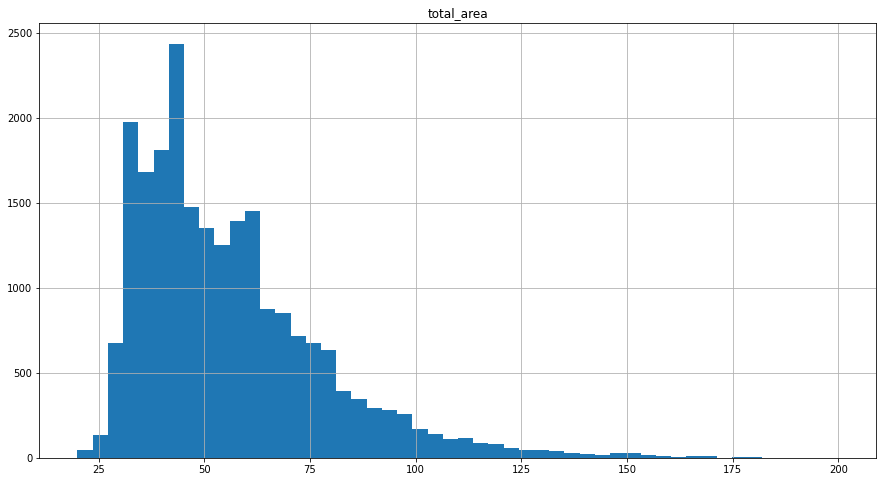

In [84]:
filtered.hist('total_area', range=(20, 200), bins=50, figsize=(15, 8));

График общей площади выглядит нормально.

##### Жилая площадь

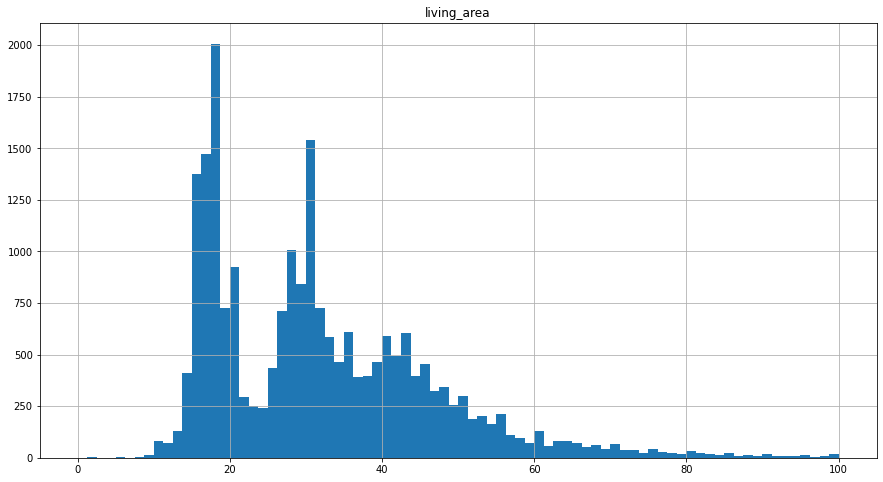

In [85]:
filtered.hist('living_area', range=(0, 100), bins=80, figsize=(15, 8));

Есть два всплеска количества значений около 20 и около 30, но они в целом согласуются с графиком общей площади. Похоже, что один из пиков из-за квартир без кухонь (площадь которых до 5).

##### Площадь кухни

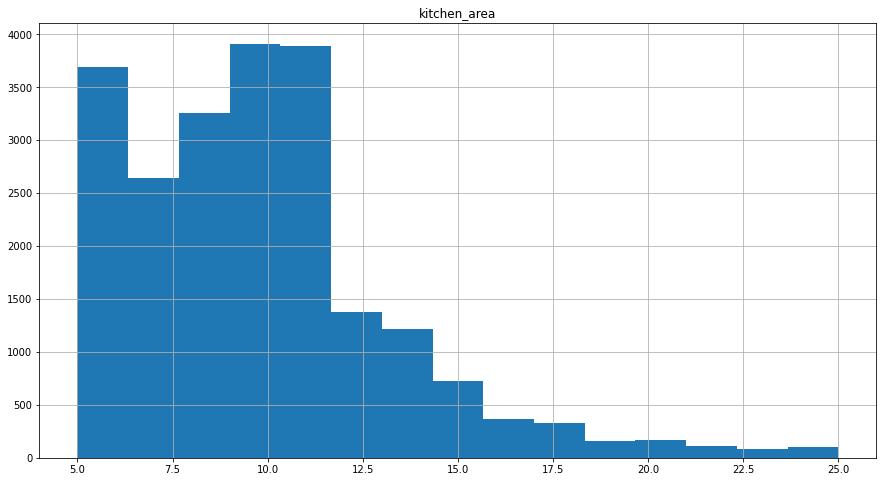

In [86]:
filtered.hist('kitchen_area', range=(5, 25), bins=15, figsize=(15, 8));

Больше всего квартир с примерно кухней площадью 10 кв.м.

##### Цена объекта

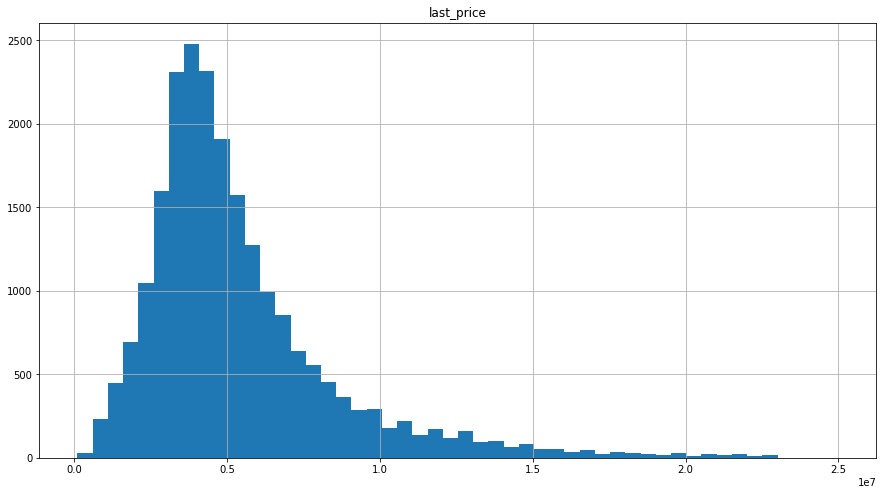

In [87]:
filtered.hist('last_price', range=(1 * 10**5, 2.5 * 10**7), bins=50, figsize=(15, 8));

Самое большое количество квартир стоимостью около 4 миллионов. А от пика график в обе стороны ниспадает. Выглядит корректно.

##### Количество комнат

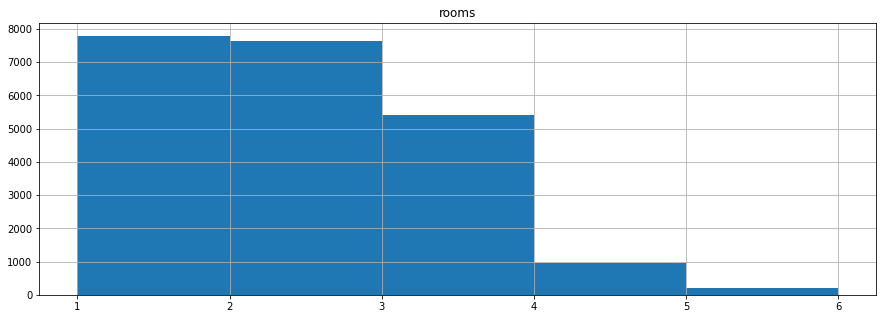

In [88]:
filtered.hist('rooms', range=(1, 6), bins=5, figsize=(15, 5));

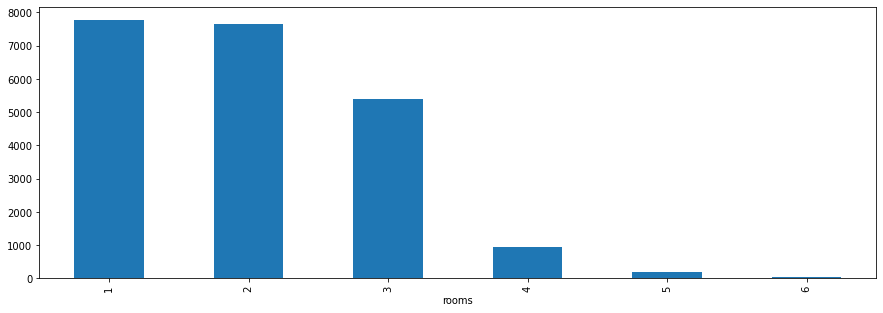

In [89]:
filtered[filtered['rooms'] != 0].value_counts('rooms').plot(kind='bar', figsize=(15,5));

Больше всего квартир с 1-3 комнатами. Иных же даже в сумме меньше, чем 3-комнатных квартир.

В целом значения нормальные и на этом графике, лишь вызывает вопросы 0 комнат.

##### Высота потолков

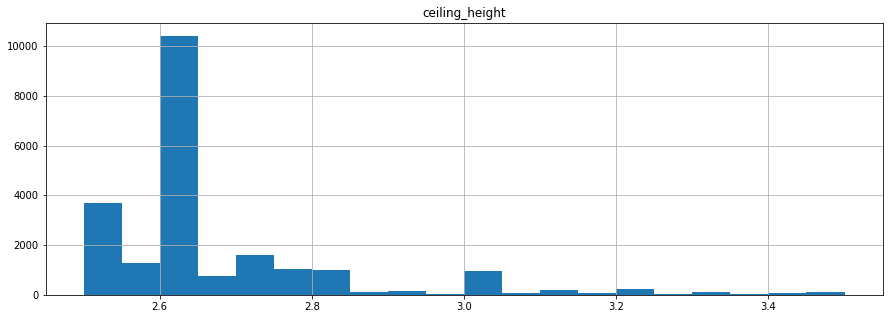

In [90]:
filtered.hist('ceiling_height', range=(2.5, 3.5), bins=20, figsize=(15, 5));

В целом похоже на правду. Самое большое количество квартир с потолками от 2.5 до 3 метров.

##### Тип этажа

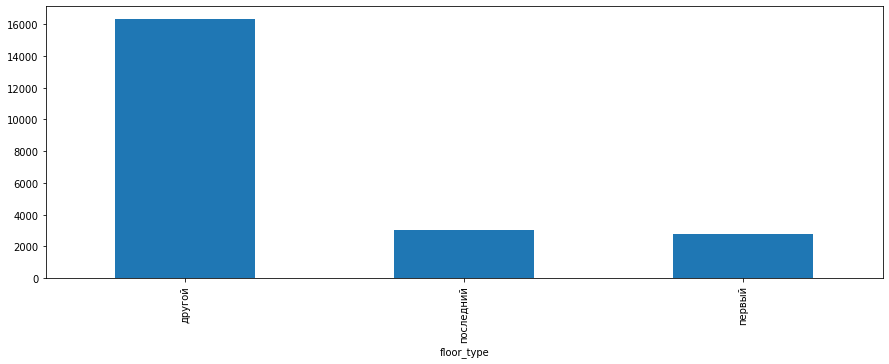

In [91]:
filtered.value_counts('floor_type').plot(kind='bar', figsize=(15, 5));

График выглядит правдоподобно.

##### Количество этажей

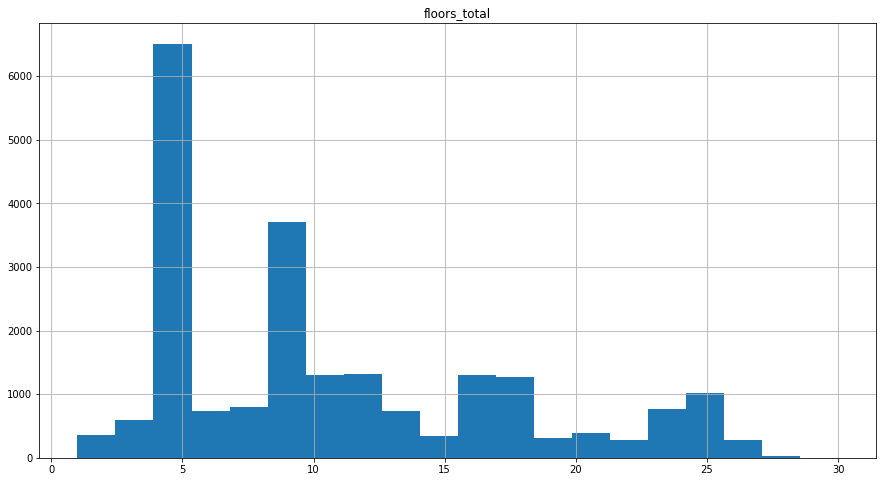

In [92]:
filtered.hist('floors_total', range=(1, 30), bins=20, figsize=(15, 8));

Похоже больше всего домов высотой в 5 этажей.

##### Близость к центру города

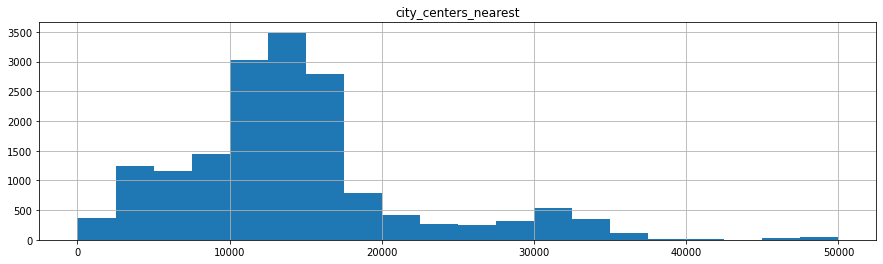

In [93]:
(
    filtered[filtered['city_centers_nearest'] != filtered['city_centers_nearest'].mode()[0]]
    .hist('city_centers_nearest', bins=20, range=(0, 50000), figsize=(15, 4))
);

В целом выглядит нормально, но странно выглядят значения больше 40 км.

##### Ближайшие аэропорты

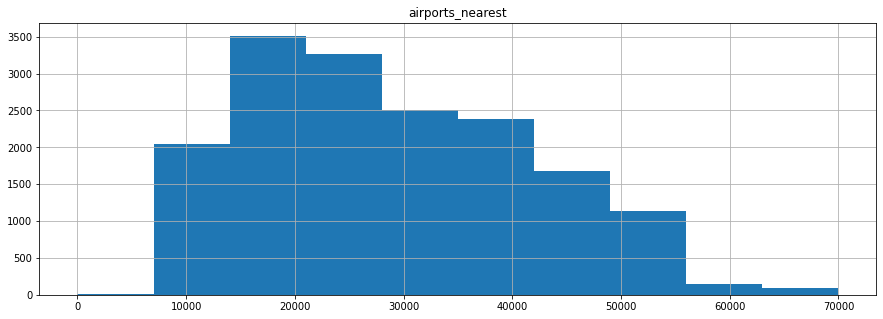

In [94]:
(
    filtered[filtered['airports_nearest'] != filtered['airports_nearest'].mode()[0]]
    .hist('airports_nearest', bins=10, range=(0, 70000), figsize=(15,5))
);

График выглядит нормально.

##### Ближайшие парки

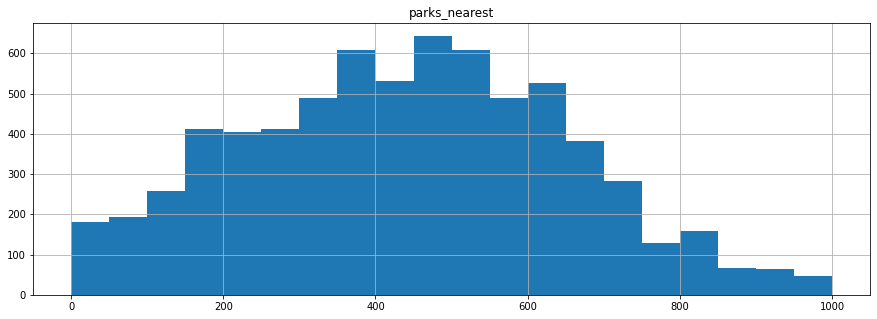

In [95]:
(
    filtered[filtered['parks_nearest'] != filtered['parks_nearest'].mode()[0]]
    .hist('parks_nearest', bins=20, range=(0, 1000), figsize=(15,5))
);

Тем к кого парк прямо рядом с домом очень повезло. Чаще всего до него идти пол км.

##### День и месяц публикации объявления

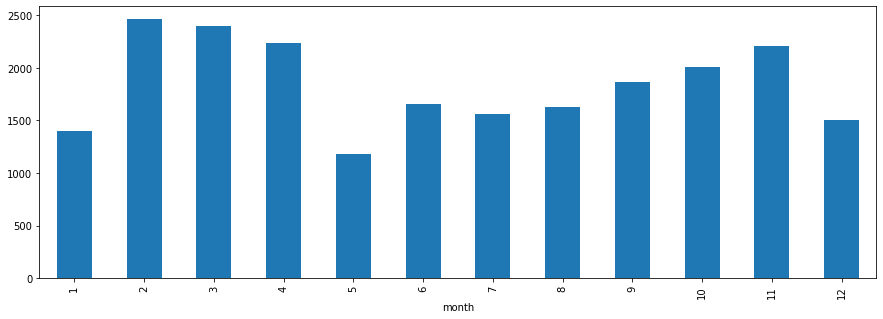

In [96]:
filtered.value_counts('month').sort_index().plot(kind='bar', figsize=(15,5));

Интересно, что в феврале опубликовано было больше всего объявлений.

In [97]:
filtered.query("month == 2").groupby('year').count()['month']

year
2015      43
2016     236
2017     402
2018    1256
2019     527
Name: month, dtype: int64

In [98]:
filtered.query("month == 3").groupby('year').count()['month']

year
2015     85
2016    324
2017    210
2018    965
2019    817
Name: month, dtype: int64

In [99]:
filtered.query("month == 4").groupby('year').count()['month']

year
2015     40
2016    393
2017    612
2018    288
2019    902
Name: month, dtype: int64

Похоже, что в 2018 году в феврале просто было опубликовано много предложений, потому февраль лидирует и суммарно.

Публикуют гораздо публикуют больше всего объявлений в февраль, март и ноябрь.

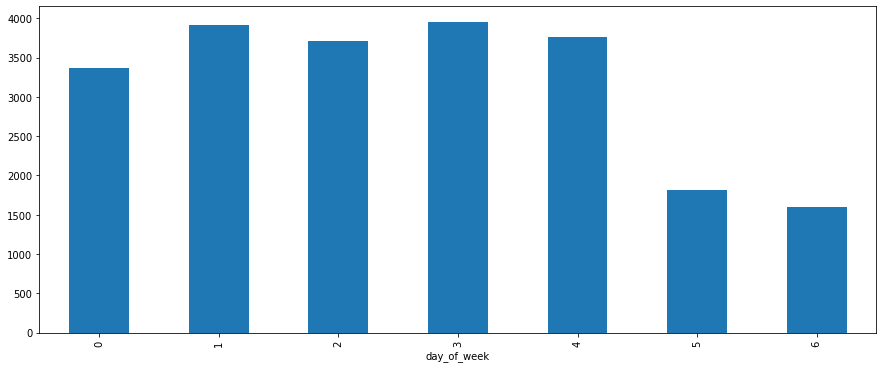

In [100]:
filtered.value_counts('day_of_week').sort_index().plot(kind='bar', figsize=(15,6));

Видно, что больше всего публикуют в будние дни.

#### Скорость продажи

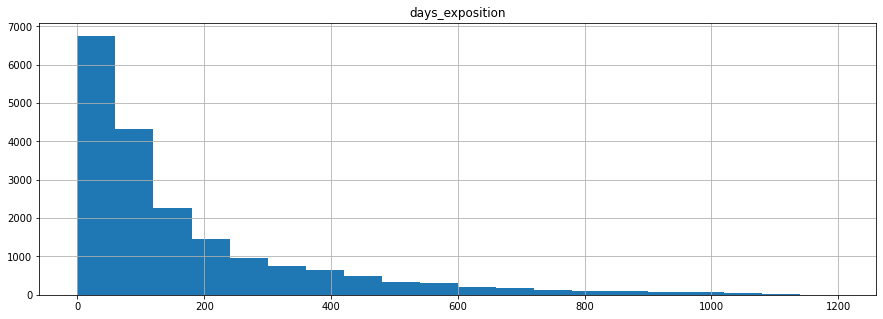

In [101]:
filtered.hist('days_exposition', range=(0, 1200), bins=20, figsize=(15,5));

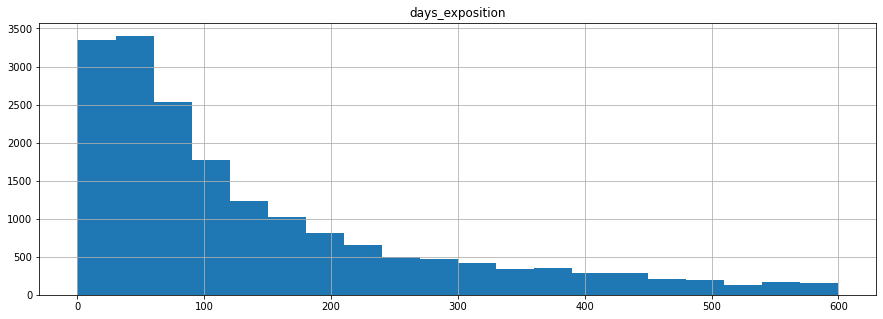

In [102]:
filtered.hist('days_exposition', range=(0, 600), bins=20, figsize=(15,5));

In [103]:
round(filtered['days_exposition'].mean(), 2)

170.14

In [104]:
filtered['days_exposition'].median()

93.0

In [105]:
for num in filtered['days_exposition'].value_counts().index[0:5]:
    counter = filtered['days_exposition'].value_counts()[num]
    print(f'{round(num)}: {counter}')

45: 856
60: 526
7: 221
30: 195
4: 168


Чаще всего квартиру продают за 1.5-2 месяца.

In [106]:
(
    filtered[['days_exposition']]
    .quantile([0.25, 0.75])
    .style.format("{:,.2f}")
)

,days_exposition
0.25,44.00
0.75,222.00


Получается менее, чем за 1.5 месяца проданная квартира - это быстрая продажа. Более, чем за 222 дня - долгая продажа.

#### Зависимость стоимости от параметров

##### Стоимость от общей площади

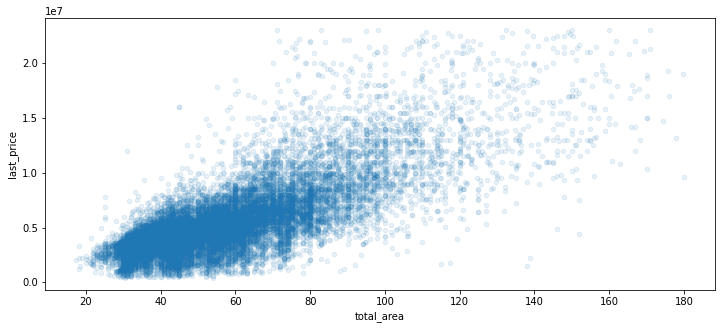

In [107]:
filtered.plot(kind='scatter', x='total_area', y='last_price', alpha=0.1, figsize=(12,5));

Зависимость прослеживается, но видно, что она не прямая, значит есть еще иные факторы, которые влияют на цену.

##### Стоимость от жилой площади

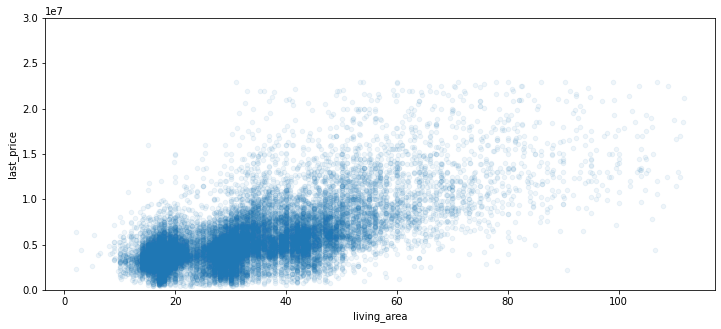

In [108]:
filtered.plot(kind='scatter', x='living_area', y='last_price', ylim=(0, 30000000), alpha=0.07, figsize=(12,5));

Зависимость есть, но не слабее, чем с общей площадью.

##### Стоимость от площади кухни

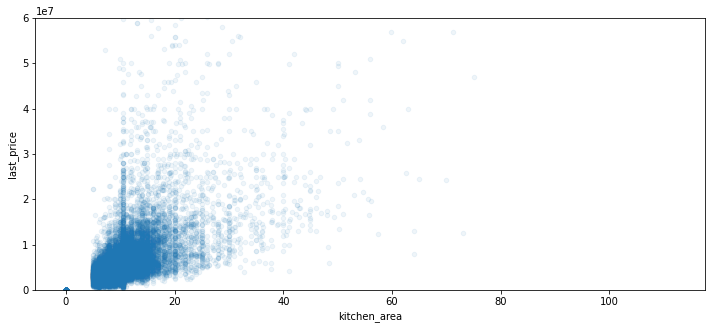

In [109]:
data.plot(kind='scatter', x='kitchen_area', y='last_price', ylim=(0, 60000000), alpha=0.07, figsize=(12,5));

Может и есть зависимость, но она довольно слабая.

##### Стоимость от кол-ва комнат

In [110]:
round(filtered['rooms'].corr(filtered['last_price'], method='pearson'), 2)

0.48

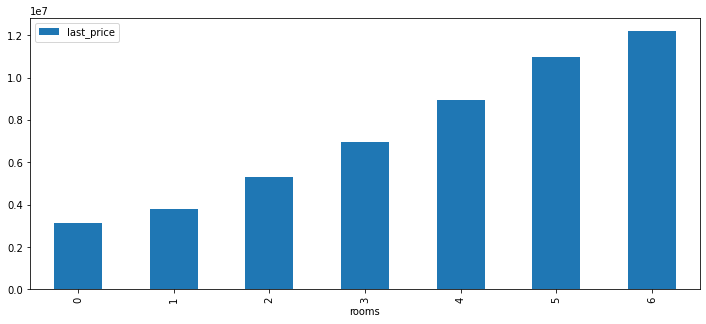

In [111]:
filtered.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(12,5));

In [112]:
round(filtered['rooms'].corr(filtered['last_price'], method='pearson'), 2)

0.48

Давайте еще проверим зависимость кол-ва комнат от площади квартиры.

In [113]:
round(filtered['rooms'].corr(filtered['total_area'], method='pearson'), 2)

0.8

По графику это прямая зависимость. Каждое последующее значение растет. Процент корреляции чуть меньше 50, что тоже показывает наличие зависимости.

##### Стоимость от типа этажа

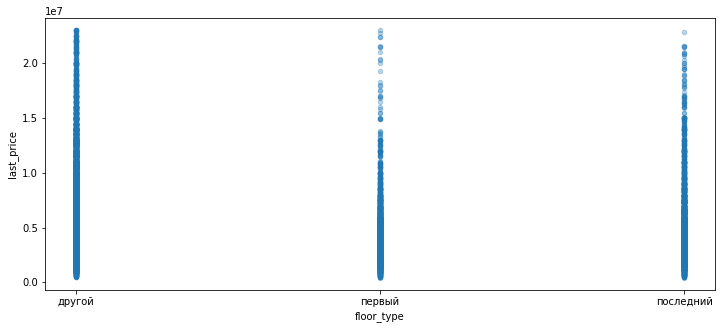

In [114]:
filtered.plot(kind='scatter', x='floor_type', y='last_price', alpha=0.3, figsize=(12,5));

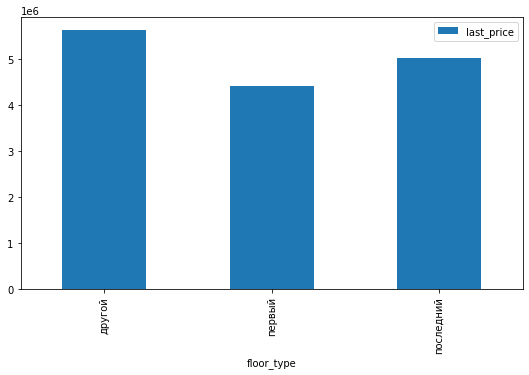

In [115]:
filtered.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(9,5));

In [116]:
round(filtered['floor'].corr(filtered['last_price'], method='pearson'), 2)

0.1

Не видна зависимость цены от этажа.

##### Стоимость от даты размещения

<AxesSubplot:xlabel='day_of_week'>

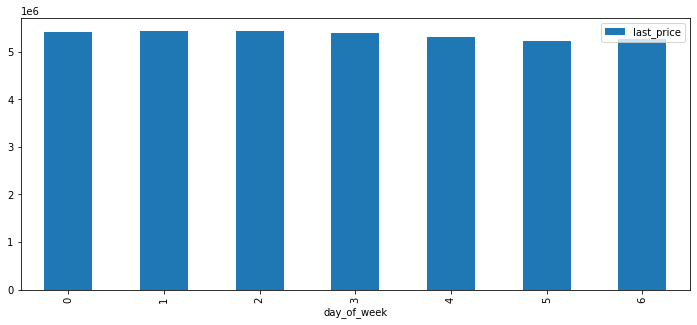

In [117]:
filtered.pivot_table(index='day_of_week', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(12,5))

Цена не зависит от дня недели.

<AxesSubplot:xlabel='month'>

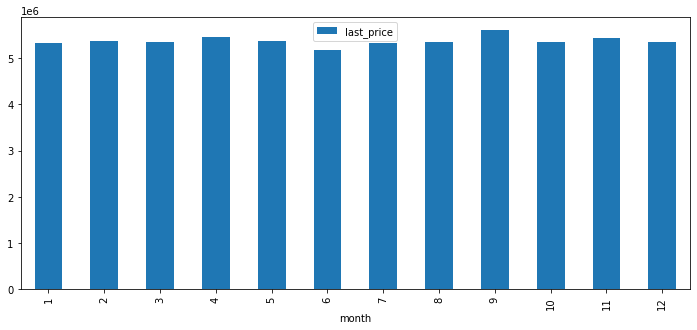

In [118]:
filtered.pivot_table(index='month', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(12,5))

In [119]:
round(filtered['month'].corr(filtered['last_price'], method='pearson'), 2)

0.01

Цена немного плавает в зависимости от месяца, но не похоже, что есть прямая зависимость.

<AxesSubplot:xlabel='year'>

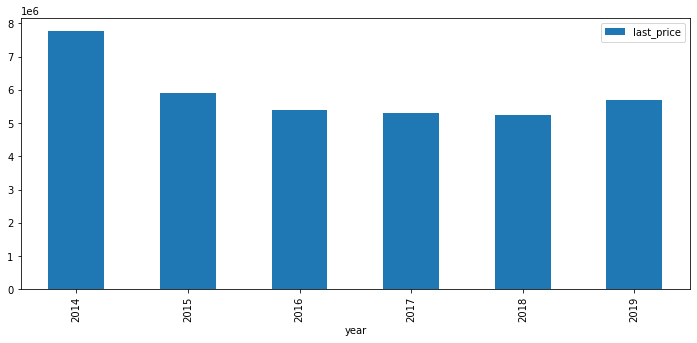

In [120]:
(
    filtered.pivot_table(index='year', values='last_price', aggfunc='mean')
    .plot(kind='bar', figsize=(12,5))
)

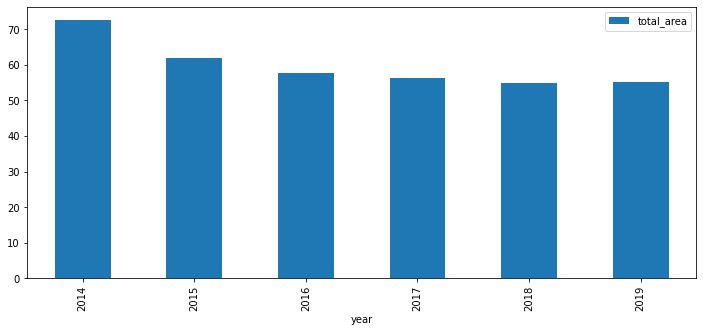

In [121]:
(
    filtered.pivot_table(index='year', values='total_area', aggfunc='mean')
    .plot(kind='bar', figsize=(12,5))
);

In [122]:
round(filtered['year'].corr(filtered['last_price'], method='pearson'), 2)

-0.01

Похоже цена на квартиры падала по какой-то причине каждый год, в отличие от последнего. Но скорее всего были какие-то иные факторы, которые менялись с годами, которые и привели к падению цены.

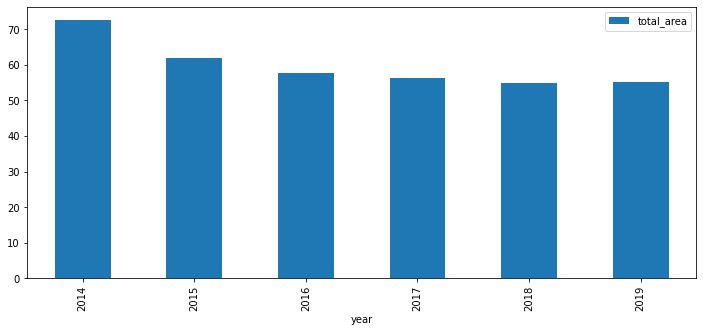

In [123]:
(
    filtered.pivot_table(index='year', values='total_area', aggfunc='mean')
    .plot(kind='bar', figsize=(12,5))
);

Похоже с годами снижалась средняя площадь квартир, что и повлияло на среднюю цену.

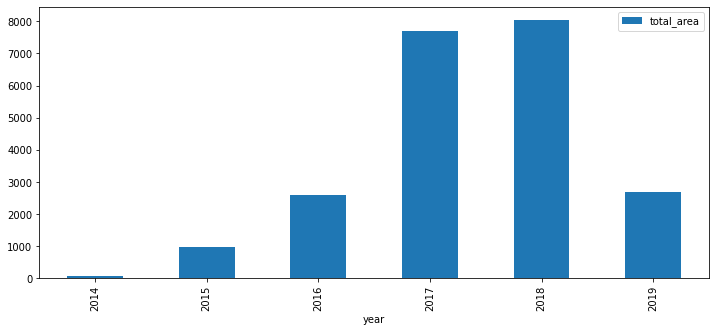

In [124]:
# check
(
    filtered.pivot_table(index='year', values='total_area', aggfunc='count')
    .plot(kind='bar', figsize=(12,5))
);

#### Средняя цена кв. метра в самых популярных населенных пунктах

In [125]:
top_10 = (
    filtered.loc[data['only_name'].isin(data['only_name'].value_counts().index[:11])]
    .pivot_table(index='only_name', values='price_per_square_meter', aggfunc='mean')
    .sort_values(by='price_per_square_meter', ascending=False)
)
round(top_10, 1)

,price_per_square_meter
only_name,
Санкт-Петербург,108728.2
Пушкин,101762.7
Кудрово,95068.8
Парголово,90218.9
Мурино,85531.6
Шушары,78286.8
Колпино,75366.7
Гатчина,68789.3
Всеволожск,66927.0


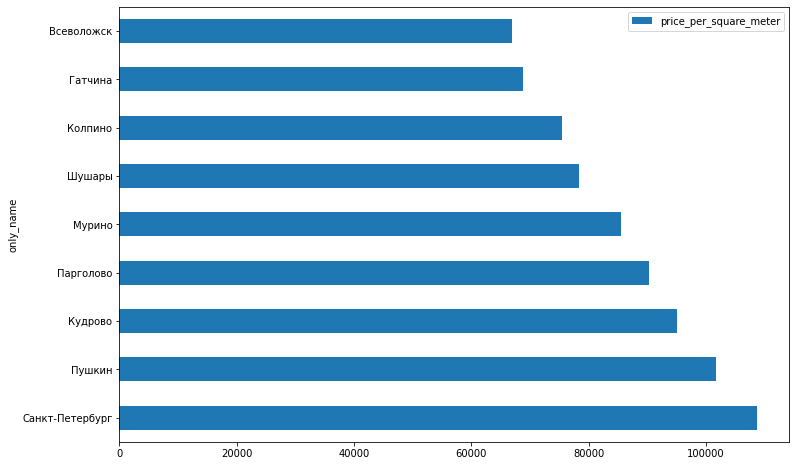

In [126]:
top_10.plot(kind='barh', figsize=(12, 8));

In [127]:
top_10.max()

price_per_square_meter    108728.163685
dtype: float64

In [128]:
top_10.min()

price_per_square_meter    66926.959686
dtype: float64

#### Зависимость от расстояния до центра в Санкт-Петербурге

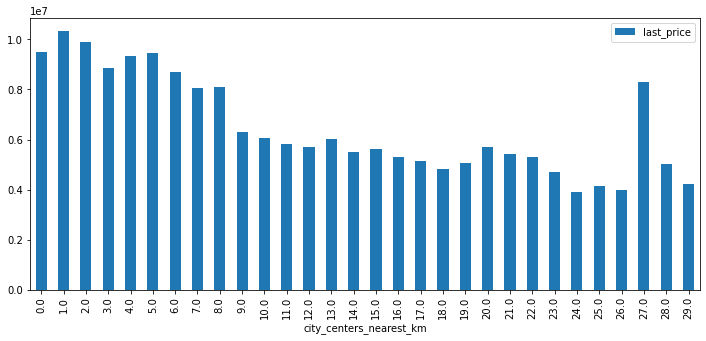

In [129]:
(
    filtered.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
    .plot(kind='bar', figsize=(12,5))
);

<AxesSubplot:xlabel='city_centers_nearest_km'>

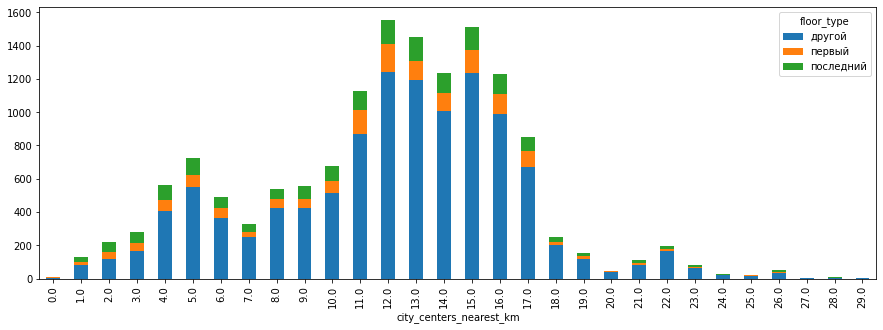

In [130]:
(
    filtered.query('locality_name == "Санкт-Петербург"')
    .groupby(by=['city_centers_nearest_km', 'floor_type'])
    .count()['locality_name']
    .unstack()
    .plot(kind='bar', figsize=(15, 5), stacked=True)
)

Похоже на 4-6 км. жилой квартал, при том довольно дорогой. А до 4 км. самый центр и он не особо жилой. В 0-2 км. немного очень дорогих квартир. На 3-ем же больше квартир, чем на меньших км., потому что площадь больше, а дешевле они, потому что старые.

In [131]:
(
    filtered.query("city_centers_nearest_km == 3 & locality_name == 'Санкт-Петербург'")\
    .sort_values('last_price', ascending=False)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,only_name,price_per_square_meter,day_of_week,month,year,floor_type,city_centers_nearest_km
20918,8,23000000,160.0,2017-07-29,4,2.60,7.0,90.362483,5,True,...,3,182.0,145.0,Санкт-Петербург,143750.000000,5,7,2017,другой,3.0
1777,20,22900000,149.0,2018-10-15,5,3.00,7.0,107.000000,6,True,...,1,849.0,18.0,Санкт-Петербург,153691.275168,0,10,2018,другой,3.0
7633,19,20900000,121.0,2016-05-13,4,3.13,6.0,75.000000,3,True,...,1,826.0,40.0,Санкт-Петербург,172727.272727,4,5,2016,другой,3.0
975,19,19999000,78.6,2018-09-19,3,2.96,6.0,50.200000,4,True,...,0,480.0,180.0,Санкт-Петербург,254440.203562,2,9,2018,другой,3.0
19819,5,19500000,124.0,2017-08-23,3,2.60,9.0,70.030925,9,True,...,1,200.0,NaN,Санкт-Петербург,157258.064516,2,8,2017,последний,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,8,3500000,27.2,2019-04-29,1,2.80,4.0,12.100000,4,True,...,3,145.0,NaN,Санкт-Петербург,128676.470588,0,4,2019,последний,3.0
3719,8,3100000,48.8,2017-05-12,1,2.60,6.0,28.900000,1,True,...,3,155.0,80.0,Санкт-Петербург,63524.590164,4,5,2017,первый,3.0
10287,5,2800000,31.0,2018-01-15,1,2.60,5.0,16.000000,1,True,...,1,869.0,62.0,Санкт-Петербург,90322.580645,0,1,2018,первый,3.0
5239,1,2645000,24.4,2018-12-10,1,3.33,6.0,13.780279,2,True,...,2,794.0,26.0,Санкт-Петербург,108401.639344,0,12,2018,другой,3.0


In [132]:
(
    filtered.query("city_centers_nearest_km == 27 & locality_name == 'Санкт-Петербург'")\
    .sort_values('last_price', ascending=False)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,only_name,price_per_square_meter,day_of_week,month,year,floor_type,city_centers_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5.0,30.0,3,True,...,0,480.0,128.0,Санкт-Петербург,193918.918919,1,11,2017,другой,27.0
5961,6,2250000,32.0,2018-02-27,1,2.60,2.0,16.5,2,True,...,0,480.0,178.0,Санкт-Петербург,70312.500000,1,2,2018,последний,27.0


In [133]:
filtered.query("city_centers_nearest_km == 26 & locality_name == 'Санкт-Петербург'").shape[0]

53

Похоже, что такое большое значение на 27 км. связано с кол-вом значений. Там всего 2 квартиры и одна из них дорогая.

In [134]:
round(filtered.query('locality_name == "Санкт-Петербург"')['city_centers_nearest_km']\
      .corr(filtered.query('locality_name == "Санкт-Петербург"')['last_price'], method='pearson'), 2)

-0.4

Похоже есть некоторая зависимость цены от удаленности от центра города.

### Общий вывод

Мы исследовали данные сервиса Яндекс Недвижимость квартир из СПБ и ближайших населенных пунктов. Мы рассмотрели важные характеристики, как общую площадь, цену объекта, кол-во этажей, и изучили зависимость стоимости от характеристик. 

Выяснилось, что цена в первую очередь зависит от площади квартиры, кол-ва комнат (что почти напрямую зависит от общей площади). Также средняя цена падала с 2014 года из-за уменьшения средней площади квартир. Однако в 2019 году, несмотря на продолжающееся уменьшение средней площади, началось поднятие цены. В Санкт-Петербурге же еще есть корреляция между близостью к центру и стоимостью.

Квартиры в среднем продаются пол года, чаще всего за 45-60 дней. Так, если сделка произошла менее чем за 44, это удачная и быстрая продажа, а более чем 222 это уже необычно долгая.

В дальнейшем можно было бы проверить есть ли зависимость между стоимостью и удаленностью от центра в пригороде СПБ, сравнить средние площади квартир пригорода.

### Бонус

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

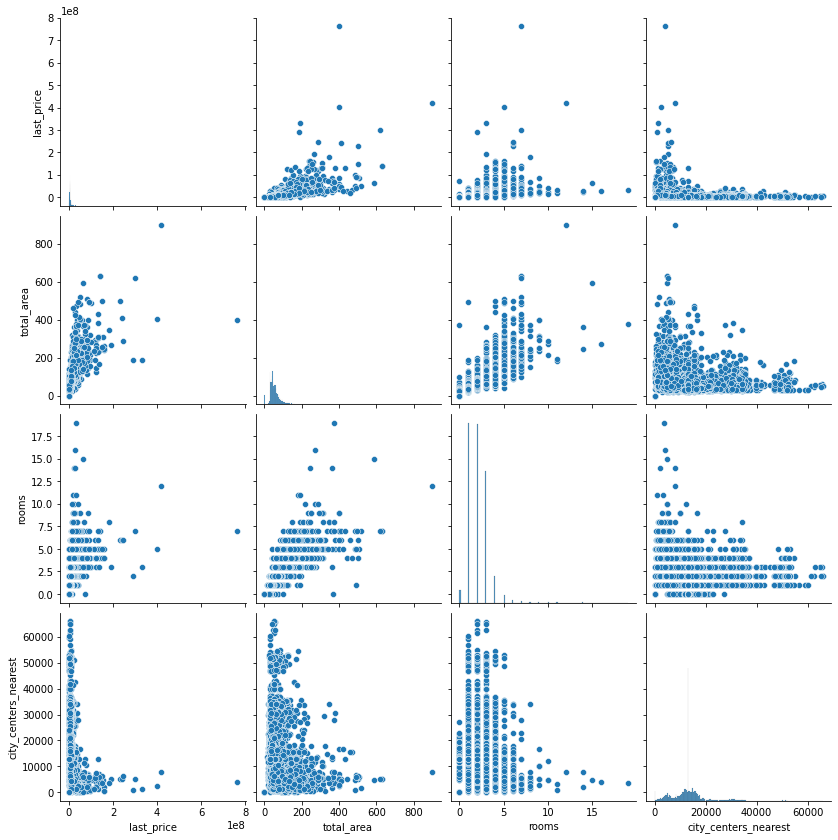

In [136]:
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


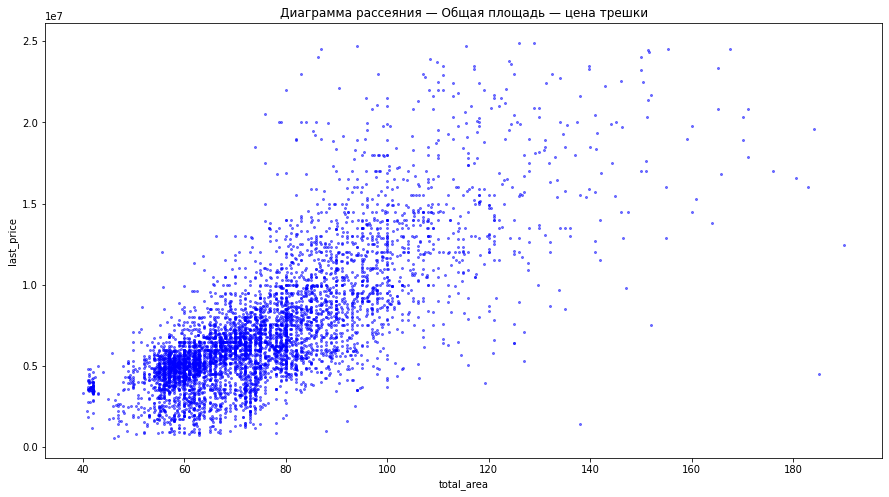

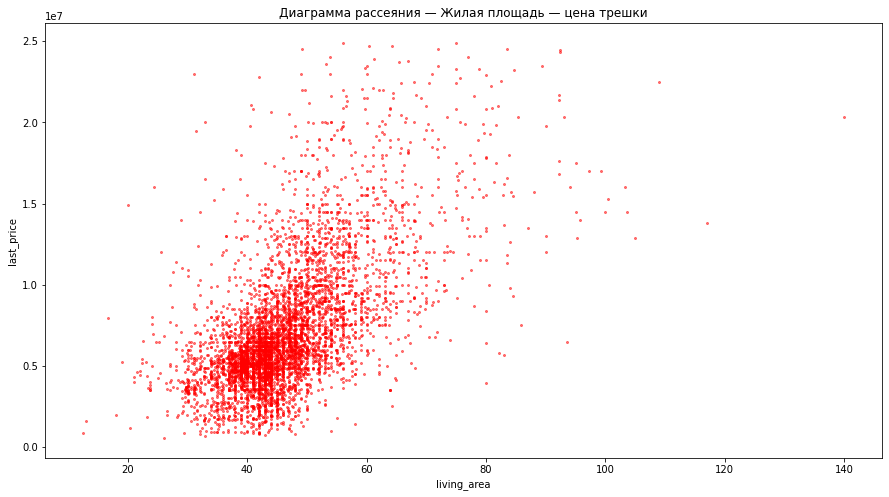

In [137]:
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

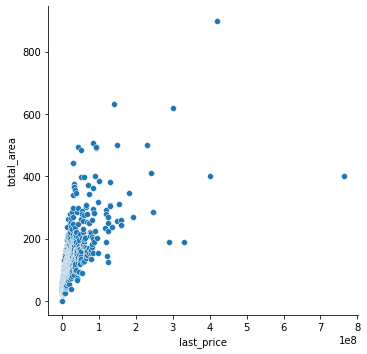

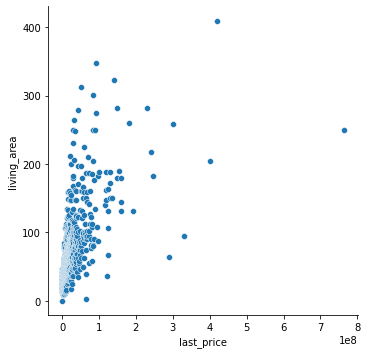

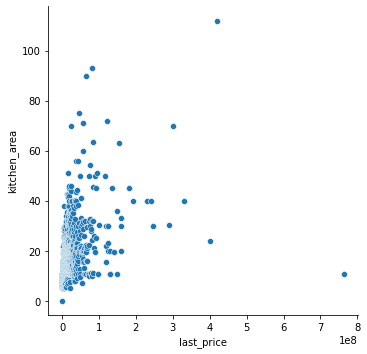

In [138]:
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')